In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

dataframe = pd.read_csv('car.csv')

In [2]:
dataframe.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')

## Part 1


## Data Cleaning

<AxesSubplot:xlabel='MPG', ylabel='Model Year'>

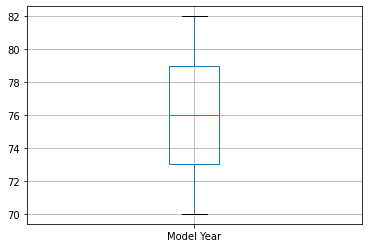

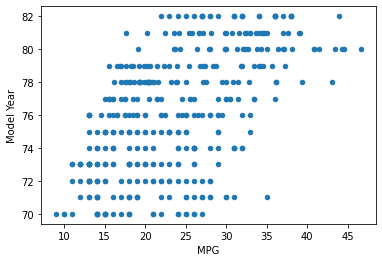

In [3]:
boxplot = dataframe.boxplot(column=['Model Year'])
dataframe.plot.scatter(x='MPG', y='Model Year')

<AxesSubplot:xlabel='MPG', ylabel='Cylinders'>

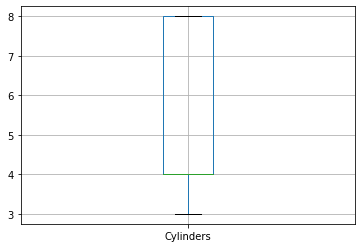

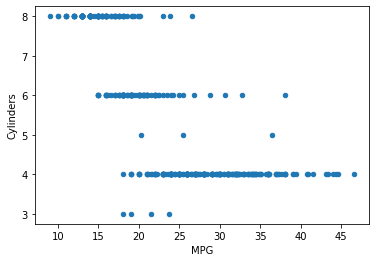

In [4]:
boxplot = dataframe.boxplot(column=['Cylinders'])
dataframe.plot.scatter(x='MPG', y='Cylinders')

<AxesSubplot:xlabel='MPG', ylabel='Displacement'>

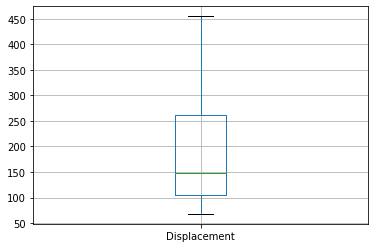

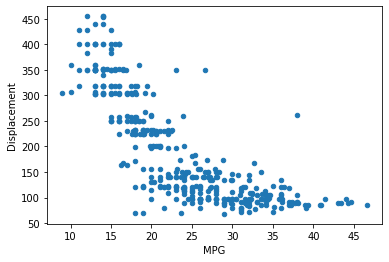

In [5]:
boxplot = dataframe.boxplot(column=['Displacement'])
dataframe.plot.scatter(x='MPG', y='Displacement')

In [6]:
#print(dataframe['Horsepower'])
dataframe.groupby('Horsepower').groups.keys()

dict_keys(['100', '102', '103', '105', '107', '108', '110', '112', '113', '115', '116', '120', '122', '125', '129', '130', '132', '133', '135', '137', '138', '139', '140', '142', '145', '148', '149', '150', '152', '153', '155', '158', '160', '165', '167', '170', '175', '180', '190', '193', '198', '200', '208', '210', '215', '220', '225', '230', '46', '48', '49', '52', '53', '54', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '?'])

In [7]:
len(dataframe[(dataframe['Horsepower']=='?')])

6

In [8]:
len(dataframe)

398

In [9]:
# We found 6 entries without any entry for horsepower out of 398 entries which is a very small number
# Hence we are discarding these entries to have a cleaner dataset

In [10]:
dataframe = dataframe[dataframe['Horsepower'] != '?']

In [11]:
dataframe.groupby('Horsepower').groups.keys()

dict_keys(['100', '102', '103', '105', '107', '108', '110', '112', '113', '115', '116', '120', '122', '125', '129', '130', '132', '133', '135', '137', '138', '139', '140', '142', '145', '148', '149', '150', '152', '153', '155', '158', '160', '165', '167', '170', '175', '180', '190', '193', '198', '200', '208', '210', '215', '220', '225', '230', '46', '48', '49', '52', '53', '54', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98'])

<AxesSubplot:xlabel='MPG', ylabel='Weight'>

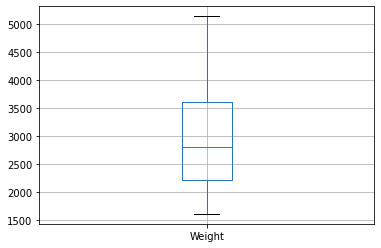

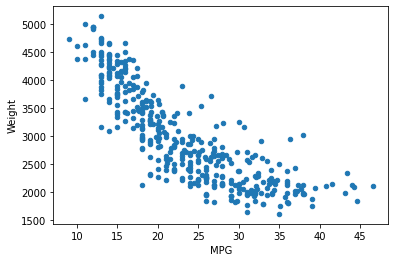

In [12]:
boxplot = dataframe.boxplot(column=['Weight'])
dataframe.plot.scatter(x='MPG', y='Weight')

<AxesSubplot:xlabel='MPG', ylabel='Acceleration'>

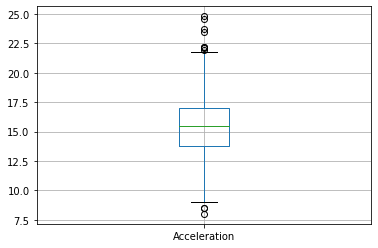

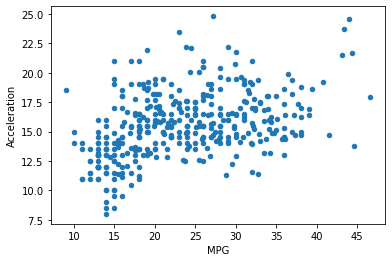

In [13]:
boxplot = dataframe.boxplot(column=['Acceleration'])
dataframe.plot.scatter(x='MPG', y='Acceleration')

In [14]:
# Though we see outliers here, we would like to consider these outliers as it could account for distribution of data

<AxesSubplot:xlabel='MPG', ylabel='US Made'>

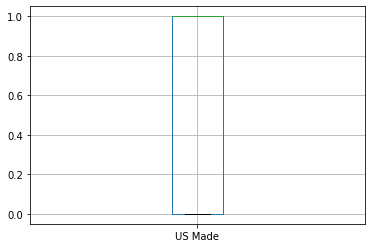

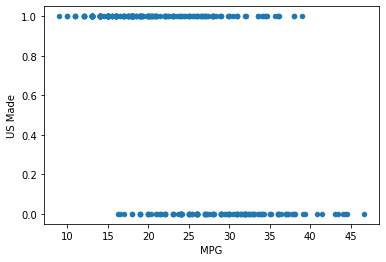

In [15]:
boxplot = dataframe.boxplot(column=['US Made'])
dataframe.plot.scatter(x='MPG', y='US Made')

In [16]:
print(dataframe['Acceleration'])

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: Acceleration, Length: 392, dtype: float64


In [17]:
dataframe['Horsepower'] = pd.to_numeric(dataframe['Horsepower'])

<ipython-input-17-ec699e048192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Horsepower'] = pd.to_numeric(dataframe['Horsepower'])


### Part 2



In [18]:
X = dataframe.drop("MPG", axis=1)
X = X.values
y = dataframe["MPG"]
y = y.values

from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

In [19]:
print(metrics.mean_squared_error(y_test, y_pred))

11.816104932118977


In [20]:
X2 = sm.add_constant(X_train) #this ensures that it adds a constant line to your model
est2 = sm.OLS(y_train, X2).fit()
#est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          3.44e-110
Time:                        18:06:22   Log-Likelihood:                -811.80
No. Observations:                 313   AIC:                             1640.
Df Residuals:                     305   BIC:                             1670.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8369      5.170     -3.257      0.0

In [21]:
#X2,X4,X6,X7
# X1-Cylinders'
# x2- 'Displacement'
# x3- 'Horsepower'
# x4- 'Weight'
# x5- 'Acceleration'
# x6- 'Model Year'
# x7- 'US Made'

        

### Part 3

In [34]:
non_imp_columns = ['Cylinders','Horsepower', 'Acceleration']
# Alpha values of these columns are more than 0.05

In [24]:
dataframe = dataframe.drop(columns=non_imp_columns)

In [25]:
dataframe.columns

Index(['MPG', 'Displacement', 'Weight', 'Model Year', 'US Made'], dtype='object')

In [26]:
X = dataframe.drop("MPG", axis=1)
X = X.values
y = dataframe["MPG"]
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [27]:
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

11.530003539667106


In [28]:
X2 = sm.add_constant(X_train) #this ensures that it adds a constant line to your model
est2 = sm.OLS(y_train, X2).fit()
#est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     342.6
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          5.08e-112
Time:                        18:06:22   Log-Likelihood:                -816.31
No. Observations:                 313   AIC:                             1643.
Df Residuals:                     308   BIC:                             1661.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.3910      4.477     -4.554      0.0

In [35]:
non_imp_columns = ['Displacement']
# Alpha values of this columns are more than 0.05

In [30]:
dataframe = dataframe.drop(columns=non_imp_columns)

In [31]:
X = dataframe.drop("MPG", axis=1)
X = X.values
y = dataframe["MPG"]
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [32]:
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

11.566250175774444


In [33]:
X2 = sm.add_constant(X_train) #this ensures that it adds a constant line to your model
est2 = sm.OLS(y_train, X2).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     452.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          1.17e-112
Time:                        18:06:22   Log-Likelihood:                -818.01
No. Observations:                 313   AIC:                             1644.
Df Residuals:                     309   BIC:                             1659.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2905      4.454     -4.331      0.0

##### After not considering displacement we see there is an increase in the error hence we would NOT REMOVE DISPLACEMENT VARIABLE

### Hence the Final linear equation for predicting the mpg is : 

## mpg = 0.01*Displacement - 0.0068*Weight + 0.835*Model_Year - 2.2109*US_Made - 20.39